In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data = pd.read_csv('cirrhosis.CSV')
data_file = r"./ML Research CNN/tcga.rnaseq_fpkm_uq.example.txt.gz"
data = pd.read_csv(data_file, sep="\t")

In [3]:
data.head()

,project,ENSG00000198886,ENSG00000198938,ENSG00000198712,ENSG00000198804,ENSG00000198695,ENSG00000198899,ENSG00000198763,ENSG00000198727,ENSG00000198840,...,ENSG00000162688,ENSG00000156026,ENSG00000104907,ENSG00000141030,ENSG00000172331,ENSG00000121101,ENSG00000106123,ENSG00000127616,ENSG00000108848,ENSG00000156171
0,BRCA,142443345,205445265,147699305,117404552,19543789,128074538,100669015,78626906,94521528,...,382567,95352,304543,308747,226017,5440,18911,343402,424057,351094
1,BRCA,78709354,135482824,121180246,88804234,39039866,71029840,41166438,62038429,80445271,...,160738,120179,179252,441331,226645,4703,49153,441665,319501,347807
2,BRCA,99604197,117501309,145945037,125820545,29398067,111459668,57571894,72484994,47528866,...,348926,143608,132642,287426,166473,19628,6255,410590,551479,266470
3,BRCA,199000111,166111590,196725218,172250215,48695291,104508816,102453636,108779676,116175259,...,91047,257669,206994,350421,325966,45224,18814,337762,306825,362499
4,BRCA,101196052,165092542,101739391,98060933,30626957,101645175,61853651,86458871,65193762,...,176419,90094,130460,415061,176510,16120,28053,241460,269349,277226


In [4]:
data.shape

(600, 5001)

In [5]:
data['project'].unique()

array(['BRCA', 'COAD', 'KIRC'], dtype=object)

In [6]:
df = data.loc[:, data.columns != 'project']
from sklearn import preprocessing
# Get column names first
names = df.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [7]:
from sklearn import preprocessing
from sklearn import decomposition

pca = decomposition.PCA()
df_plot = pd.DataFrame(pca.fit_transform(scaled_df), index=data.index)
df_plot

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
0,-2.839657,-10.445880,15.237815,-16.702372,8.842484,3.373958,-1.665245,1.554028,7.223032,6.370468,...,0.101700,0.039865,0.021387,0.036883,0.027455,-0.043504,0.021644,-0.008426,-0.096327,2.928447e-15
1,12.418740,-18.714515,18.695366,3.499248,-11.228010,-0.568816,6.193201,2.626075,-11.549008,1.337317,...,0.003278,0.100219,0.037245,-0.004829,-0.072288,0.055188,-0.016110,0.023687,-0.034666,2.928447e-15
2,0.507426,-28.774181,14.346849,-6.032672,-1.665448,-2.608347,2.873119,-3.018353,-3.001003,0.967144,...,-0.013474,0.095272,0.091443,0.006505,0.080337,-0.045930,0.037766,-0.008267,0.012735,2.928447e-15
3,-6.635627,-13.545971,16.128075,-16.766871,-8.800637,23.237971,-0.205306,-7.339374,-1.599968,1.460868,...,0.046064,0.104461,-0.066532,-0.084757,-0.019888,0.057780,-0.052449,0.011639,0.074563,2.928447e-15
4,-20.454584,-26.694659,8.042968,3.883628,5.067656,7.025973,-2.605806,2.030753,4.197511,4.008807,...,-0.076781,0.089052,-0.021307,0.191474,-0.197166,0.060877,0.045007,-0.032184,0.077287,2.928447e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,-26.348827,27.139345,-3.913466,-1.927165,-7.841317,-8.896410,6.165722,-6.550848,-3.841771,-2.034988,...,0.220170,-0.138107,0.001747,-0.125084,0.016085,-0.072357,0.084657,0.118905,-0.081201,2.928447e-15
596,-32.943383,13.944946,-9.666437,-5.316212,-5.963663,1.328434,-3.631446,-5.033466,9.674514,0.461627,...,-0.185786,-0.388123,0.257948,0.351359,-0.102648,0.015429,0.201576,0.161453,-0.077303,2.928447e-15
597,-36.881629,12.909506,0.796766,17.039347,-13.931855,1.611128,3.877636,0.752845,1.587419,14.086768,...,0.040499,0.004179,-0.023970,0.051491,0.014701,0.190600,-0.050214,0.061451,0.205603,2.928447e-15
598,-16.995201,33.833190,-2.559493,-16.987569,1.239054,-13.875813,-5.992537,2.454351,6.277324,-0.119567,...,0.175142,-0.057578,-0.105122,-0.184133,-0.081636,-0.041033,-0.076382,-0.135030,0.065253,2.928447e-15


In [8]:
pca = decomposition.PCA()
# fit : Run PCA
df_PC = pca.fit(scaled_df)

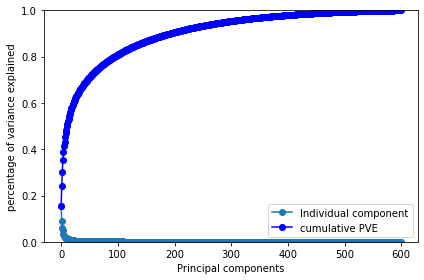

In [9]:
# print("Standard Deviations of Principal Components: \n", np.sqrt(df_PC.explained_variance_ratio_))

# Percentage of Variance Explained (PVE) by each PC:
plt.figure(figsize=(6, 4))
plt.ylim(0, 1)

plt.plot(df_PC.explained_variance_ratio_, '-o', label='Individual component')
plt.plot(np.cumsum(df_PC.explained_variance_ratio_), 'bo-', label='cumulative PVE')

plt.ylabel('percentage of variance explained')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
print(np.cumsum(df_PC.explained_variance_ratio_))

[0.15293673 0.24174977 0.30315427 0.355137   0.3882034  0.41360936
 0.43321753 0.45155085 0.46880016 0.48396303 0.49840139 0.51084905
 0.5220417  0.53278277 0.54298662 0.55261814 0.56118531 0.56921006
 0.57698085 0.58405942 0.59069431 0.59714626 0.60321559 0.60891179
 0.61449137 0.61995392 0.62520628 0.6301012  0.6348273  0.63945158
 0.64377963 0.64803345 0.65211666 0.65607026 0.65982107 0.6635507
 0.66722632 0.67087303 0.67441573 0.67789729 0.68129983 0.68460993
 0.68781765 0.69093938 0.69397969 0.69696957 0.69991297 0.7028317
 0.70574137 0.70855415 0.71134047 0.71407134 0.7167468  0.71938739
 0.7219941  0.72451644 0.72702223 0.72945552 0.73186405 0.73424084
 0.73658973 0.7388832  0.74117136 0.74342685 0.74564599 0.74784472
 0.75003146 0.75215318 0.75425067 0.75634    0.75840425 0.76043711
 0.76243366 0.76440704 0.76636196 0.76825509 0.77013911 0.77199741
 0.773823   0.77563231 0.77743288 0.77920183 0.78096388 0.78270763
 0.78442747 0.78611692 0.78779648 0.78945527 0.7910971  0.792711

In [11]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()


# data['Status']= label_encoder.fit_transform(data['Status'])
# data['Drug']= label_encoder.fit_transform(data['Drug'])
# data['Sex']= label_encoder.fit_transform(data['Sex'])
# data['Ascites']= label_encoder.fit_transform(data['Ascites'])
# data['Hepatomegaly']= label_encoder.fit_transform(data['Hepatomegaly'])
# data['Spiders']= label_encoder.fit_transform(data['Spiders'])
# data['Edema']= label_encoder.fit_transform(data['Edema'])          

In [12]:
# X = data.drop(['Stage'], axis = 1)
# X = X.drop(['ID'], axis = 1)
# X = X.drop(['Sex'], axis = 1)
# X = X.drop(['Status'], axis = 1)
# X = X.drop(['Ascites'], axis = 1)
# X = X.drop(['Edema'], axis = 1)
# X = X.drop(['Drug'], axis = 1)
# X = X.drop(['N_Days'], axis = 1)
# X = X.drop(['Prothrombin'], axis = 1)
# X = X.drop(['Platelets'], axis = 1)
# X = X.drop(['Tryglicerides'], axis = 1)

# y = data['Stage']

In [13]:
def create_one_row(row):
    list_temp = []
    for value in row:
        list_temp.append(value - row.mean())
    list_row = np.array(list_temp).reshape(5,5)
    return list_row

def transform_dataframe(df):
    final_df = []
    for i in range(len(df)):
        final_df.append(create_one_row(df.iloc[i].values))
    return final_df

X = pd.DataFrame()
for i in range(25):
    X[i] = df_plot[i]
final_df = transform_dataframe(X)

In [14]:
# trial = np.array(final_df[0][0]).reshape(3,3)
# trial = np.array(final_df[0]).reshape(3,3)
trial = final_df[0]
trial

array([[-3.59666516e+00, -1.12028878e+01,  1.44808065e+01,
        -1.74593803e+01,  8.08547623e+00],
       [ 2.61694957e+00, -2.42225337e+00,  7.97019697e-01,
         6.46602376e+00,  5.61346010e+00],
       [-9.27720623e+00,  1.03136121e-02,  3.37983358e+00,
         4.62276996e-01,  4.63506533e+00],
       [-5.23966679e+00,  8.79741170e+00,  2.05237725e+00,
        -7.14782313e+00,  2.10805460e+00],
       [ 3.04284111e+00, -3.13947005e+00, -4.24129359e+00,
         2.38716231e+00, -1.20842597e+00]])

In [15]:
import numpy as np
from PIL import Image

img = Image.open('rose.jpg').convert('RGBA')
arr = np.array(img)

In [16]:
!pip3 install opencv-python
import cv2
image = cv2.imread("rose.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2

# def convolve(image, kernel):
# 	# grab the spatial dimensions of the image, along with
# 	# the spatial dimensions of the kernel
# 	(iH, iW) = image.shape[:2]
# 	(kH, kW) = kernel.shape[:2]
# 	# allocate memory for the output image, taking care to
# 	# "pad" the borders of the input image so the spatial
# 	# size (i.e., width and height) are not reduced
# 	pad = (kW - 1) // 2
# 	image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
# 		cv2.BORDER_REPLICATE)
# 	output = np.zeros((iH, iW), dtype="float32")
#     # loop over the input image, "sliding" the kernel across
# 	# each (x, y)-coordinate from left-to-right and top to
# 	# bottom
# 	for y in np.arange(pad, iH + pad):
# 		for x in np.arange(pad, iW + pad):
# 			# extract the ROI of the image by extracting the
# 			# *center* region of the current (x, y)-coordinates
# 			# dimensions
# 			roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
# 			# perform the actual convolution by taking the
# 			# element-wise multiplicate between the ROI and
# 			# the kernel, then summing the matrix
# 			k = (roi * kernel).sum()
# 			# store the convolved value in the output (x,y)-
# 			# coordinate of the output image
# 			output[y - pad, x - pad] = k
#             # rescale the output image to be in the range [0, 255]
# 	output = rescale_intensity(output, in_range=(0, 255))
# 	output = (output * 255).astype("uint8")
# 	# return the output image
# 	return output
    
    
    
    
final_output = []
for i in range(len(final_df)):
#     convoleOutput = convolve(gray, final_df[i])
    convolveOutput = cv2.filter2D(gray, -1, final_df[i])
    final_output.append(convolveOutput)
#opencvOutput = cv2.filter2D(gray, -1, trial)


In [18]:
# final_output[0].shape
# cv2.imwrite('./data/stage1/saved123.png', final_output[0])
data.project.values[0]

'BRCA'

In [19]:
counter = 0
for index in range(len(final_df)):
    name = 'img' + str(counter) + '.png'
    path = './data/'
    if data.project.values[index] == "BRCA":
        path = path + "BRCA/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    elif data.project.values[index] == "COAD":
        path = path + "COAD/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    elif data.project.values[index] == "KIRC":
        path = path + "KIRC/"
        name = path + name
        cv2.imwrite(name, final_output[index])
    counter = counter + 1

In [20]:
final_output = np.array(final_output)

In [21]:
final_output.shape

(600, 400, 600)

In [22]:
!pip install torch torchvision fastai
from fastai.vision import *
from fastai.metrics import accuracy

In [ ]:
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders
from fastai.metrics import accuracy
from fastai.vision.all import *

path = "./data/train/"
size = 224
bs = 64
# data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=True, flip_vert=True),
#                                   valid_pct=0.2, size=size, bs=bs)
data = ImageDataLoaders.from_folder(path, valid_pct=0.2)
# data.normalize(imagenet_stats)
learner = cnn_learner(data, models.resnet34, metrics=[accuracy])
# learner = create_cnn_model(data, models.resnet18, metrics=[accuracy], callback_fns=ShowGraph)
learner.lr_find()
learner.recorder.plot()


Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\joshi/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


In [81]:
learner.fit_one_cycle(8, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time


RuntimeError: DataLoader worker (pid(s) 21888, 20436, 24176, 20040, 7948, 18560, 5944, 23812, 10888, 12416, 7332, 17296) exited unexpectedly

In [24]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()


ERROR: spyder 4.1.4 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 4.1.4 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.
ERROR: nbconvert 6.4.2 has requirement traitlets>=5.0, but you'll have traitlets 4.3.3 which is incompatible.


ImportError: cannot import name 'Callable' from 'traitlets' (C:\Users\joshi\anaconda3\lib\site-packages\traitlets\__init__.py)

In [29]:
!pip3 install git+https://github.com/fastai/fastai.git

  Cloning https://github.com/fastai/fastai.git to c:\users\joshi\appdata\local\temp\pip-req-build-q1_kq4lz
  Created wheel for fastai: filename=fastai-2.5.4-py3-none-any.whl size=188510 sha256=e19ace85d0a539a4a1e83fa2acbcd4ab4299fb9c1535b55c1fe0741b5ba0dc9c
  Stored in directory: C:\Users\joshi\AppData\Local\Temp\pip-ephem-wheel-cache-yc9fcapw\wheels\c3\af\7d\42ac4f35ab6679088c927b75c0be82086737c724ab00ec4b1c
Successfully built fastai
  Attempting uninstall: fastai
    Found existing installation: fastai 2.5.3
    Uninstalling fastai-2.5.3:
      Successfully uninstalled fastai-2.5.3

  Running command git clone -q https://github.com/fastai/fastai.git 'C:\Users\joshi\AppData\Local\Temp\pip-req-build-q1_kq4lz'
